<a href="https://colab.research.google.com/github/Shisiajoy/PYTHON-DATA-ANALYSIS/blob/main/pandas22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Investor
 - Flow of Funds - US

Introduction:

Special thanks to: https://github.com/rgrp for sharing the dataset.


Step 1. Import the necessary libraries


In [2]:
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called

In [3]:
url = "https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 4. What is the frequency of the dataset?

In [5]:
print("Frequency of the dataset:", pd.infer_freq(df['Date']))

Frequency of the dataset: None


Step 5. Set the column Date as the index.


In [6]:
df.set_index('Date', inplace=True)


In [7]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 6. What is the type of the index?

In [8]:
print("Type of the index:", type(df.index))


Type of the index: <class 'pandas.core.indexes.base.Index'>


Step 7. Set the index to a DatetimeIndex type

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 8. Change the frequency to monthly, sum the values and assign it to monthly.

In [21]:
monthly = df.resample('M').sum()


Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.


In [22]:
monthly.dropna(inplace=True)

Step 10. Good, now we have the monthly data. Now change the frequency to year.


In [23]:
yearly_sum = df.resample('Y').sum()

In [32]:
yearly_sum

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


BONUS: Create your own question and answer it.
 Step 11. find the year that recieved the least investors and plot a line graph

In [29]:
# Sum the investor flows for each period
period_sum = df.sum(axis=1)

period_with_least_investors = period_sum.idxmin()

least_investors = period_sum.min()

print(f"The period with the least investors is {period_with_least_investors} with total investor flows of {least_investors}")


The period with the least investors is 2014-08-06 00:00:00 with total investor flows of -26743


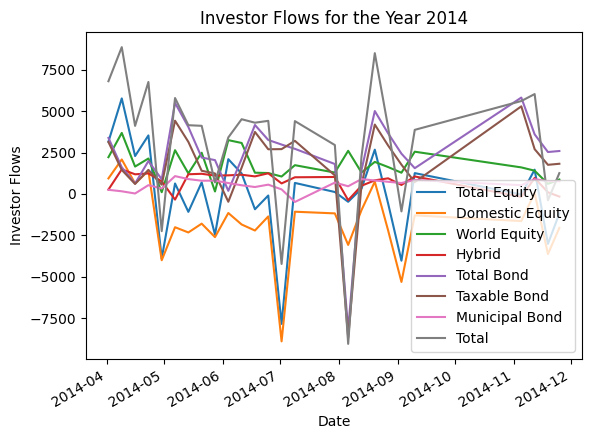

In [30]:
specific_year_data = df[df.index.year == 2014]


specific_year_data.plot(kind='line', title=f'Investor Flows for the Year {2014}')
plt.xlabel('Date')
plt.ylabel('Investor Flows')
plt.show()


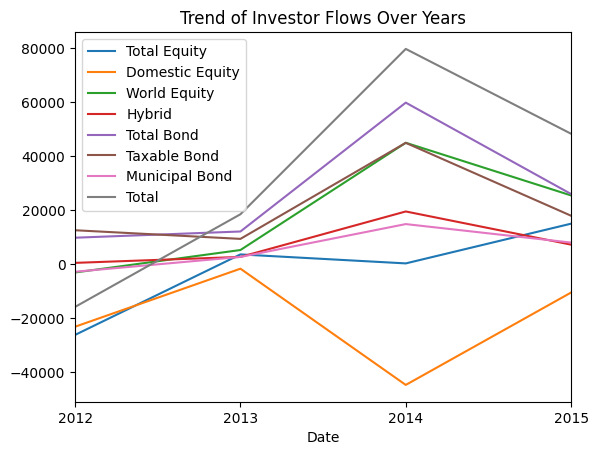

In [26]:
import matplotlib.pyplot as plt

yearly_sum.plot(kind='line', title='Trend of Investor Flows Over Years')

# Display the plot
plt.show()